In [1]:
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import zipfile
import requests
import io
import time

In [2]:
def download_and_read_data():
    """
    Downloads and reads the Facebook food pages network data.

    This function fetches a dataset of Facebook food pages' connections, which represents the
    edges of the graph. The dataset is stored in a ZIP file, which is extracted and read
    into a pandas DataFrame.

    Returns:
        DataFrame: A pandas DataFrame containing the edges of the graph, with columns 'source' and 'target'.
        If there is an error during the download or extraction process, it returns None.
    """
    print("Downloading Facebook Food Pages Network data...")

    # URL of the dataset
    url = "https://nrvis.com/download/data/soc/fb-pages-food.zip"

    try:
        # Download the data from the URL
        response = requests.get(url)

        # Check if the request was successful (status code 200)
        if response.status_code == 200:
            # Read the ZIP file from the response content
            z = zipfile.ZipFile(io.BytesIO(response.content))

            # Extract and read the 'fb-pages-food.edges' file inside the ZIP archive
            df = pd.read_csv(z.open('fb-pages-food.edges'),
                             sep=' ',  # Separator between columns is a space
                             names=['source', 'target'])  # Column names for the DataFrame
            return df
        else:
            # Raise an exception if the download fails
            raise Exception("Failed to download the data")

    except Exception as e:
        # Catch any exceptions and print the error message
        print(f"Error while downloading the data: {e}")
        return None


In [3]:
def analyze_network(G):
    """
    Analyzes the characteristics of a Facebook pages network.

    This function computes several key network metrics for a given graph, such as degree,
    centrality measures (degree, betweenness, closeness), and PageRank. These metrics help
    understand the structure and importance of nodes (Facebook pages) in the network.

    Args:
        G: A NetworkX graph object representing the network of Facebook pages.

    Returns:
        dict: A dictionary containing various network metrics:
            - 'nodes': The number of nodes (Facebook pages) in the graph.
            - 'edges': The number of edges (connections) in the graph.
            - 'density': The density of the network (how connected the network is).
            - 'avg_degree': The average degree (number of connections) of the nodes.
            - 'max_degree': The maximum degree (most connected node).
            - 'degrees': A dictionary of degrees for each node.
            - 'degree_centrality': A dictionary of degree centrality values with max, avg, and top 10 nodes.
            - 'betweenness_centrality': A dictionary of betweenness centrality values with max, avg, and top 10 nodes.
            - 'closeness_centrality': A dictionary of closeness centrality values with max, avg, and top 10 nodes.
            - 'pagerank': A dictionary of PageRank values with max, avg, and top 10 nodes.
    """
    metrics = {}

    # 1. Basic Information
    print("\nCalculating basic information...")
    metrics['nodes'] = G.number_of_nodes()  # Number of nodes (pages)
    metrics['edges'] = G.number_of_edges()  # Number of edges (connections)
    metrics['density'] = nx.density(G)      # Network density

    # 2. Degree Analysis
    print("Calculating degree metrics...")
    start_time = time.time()
    degrees = dict(G.degree())
    metrics['avg_degree'] = np.mean(list(degrees.values()))  # Average degree
    metrics['max_degree'] = max(degrees.values())           # Maximum degree
    metrics['degrees'] = degrees                             # Degree values for each node
    print(f"Time taken for Degree metrics: {time.time() - start_time:.2f}s")

    # 3. Degree Centrality
    print("Calculating Degree Centrality...")
    start_time = time.time()
    dc = nx.degree_centrality(G)
    metrics['degree_centrality'] = {
        'values': dc,
        'max': max(dc.values()),                             # Maximum degree centrality
        'avg': sum(dc.values()) / len(dc),                   # Average degree centrality
        'top_pages': sorted(dc.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 nodes by degree centrality
    }
    print(f"Time taken for Degree Centrality: {time.time() - start_time:.2f}s")

    # 4. Betweenness Centrality
    print("Calculating Betweenness Centrality...")
    start_time = time.time()
    bc = nx.betweenness_centrality(G)
    metrics['betweenness_centrality'] = {
        'values': bc,
        'max': max(bc.values()),                             # Maximum betweenness centrality
        'avg': sum(bc.values()) / len(bc),                   # Average betweenness centrality
        'top_pages': sorted(bc.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 nodes by betweenness centrality
    }
    print(f"Time taken for Betweenness Centrality: {time.time() - start_time:.2f}s")

    # 5. Closeness Centrality
    print("Calculating Closeness Centrality...")
    start_time = time.time()
    cc = nx.closeness_centrality(G)
    metrics['closeness_centrality'] = {
        'values': cc,
        'max': max(cc.values()),                             # Maximum closeness centrality
        'avg': sum(cc.values()) / len(cc),                   # Average closeness centrality
        'top_pages': sorted(cc.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 nodes by closeness centrality
    }
    print(f"Time taken for Closeness Centrality: {time.time() - start_time:.2f}s")

    # 6. PageRank
    print("Calculating PageRank...")
    start_time = time.time()
    pr = nx.pagerank(G, alpha=0.85)  # PageRank with damping factor 0.85
    metrics['pagerank'] = {
        'values': pr,
        'max': max(pr.values()),                             # Maximum PageRank value
        'avg': sum(pr.values()) / len(pr),                   # Average PageRank value
        'top_pages': sorted(pr.items(), key=lambda x: x[1], reverse=True)[:10]  # Top 10 nodes by PageRank
    }
    print(f"Time taken for PageRank: {time.time() - start_time:.2f}s")

    return metrics


In [4]:
def print_results(metrics):
    """
    Prints the analysis results of the Facebook Food Pages network.

    This function takes the network metrics dictionary, processes the results,
    and displays the calculated network properties and centrality measures in a readable format.

    Args:
        metrics (dict): A dictionary containing various network metrics, including information
                        about nodes, edges, density, degree, centrality measures, and PageRank.

    Outputs:
        Prints the following:
        - Basic information: Total nodes, edges, network density, average degree, and max degree.
        - Centrality analysis: Degree Centrality, Betweenness Centrality, Closeness Centrality, and PageRank.
        - For each centrality measure, it prints the average, maximum, and the top 5 pages (nodes) with the highest values.
    """
    print("\nKẾT QUẢ PHÂN TÍCH MẠNG FACEBOOK FOOD PAGES")
    print("=" * 50)

    # 1. Basic Information
    print("\n1. THÔNG TIN CƠ BẢN")
    print("-" * 30)
    print(f"Số lượng trang: {metrics['nodes']:,}")  # Total number of pages (nodes)
    print(f"Số lượng liên kết: {metrics['edges']:,}")  # Total number of connections (edges)
    print(f"Mật độ mạng: {metrics['density']:.6f}")  # Network density (how connected the network is)
    print(f"Số liên kết trung bình/trang: {metrics['avg_degree']:.2f}")  # Average number of connections per page
    print(f"Số liên kết nhiều nhất: {metrics['max_degree']}")  # Maximum number of connections for a page

    # 2. Centrality Analysis
    centrality_measures = {
        'Degree Centrality': 'degree_centrality',
        'Betweenness Centrality': 'betweenness_centrality',
        'Closeness Centrality': 'closeness_centrality',
        'PageRank': 'pagerank'
    }

    # Loop through each centrality measure and print the results
    for name, measure in centrality_measures.items():
        print(f"\n{name}:")
        print(f"- Giá trị trung bình: {metrics[measure]['avg']:.6f}")  # Average value for the measure
        print(f"- Giá trị lớn nhất: {metrics[measure]['max']:.6f}")   # Maximum value for the measure
        print("\nTop 5 trang có giá trị cao nhất:")  # Display top 5 pages with the highest values
        for page, score in metrics[measure]['top_pages'][:5]:
            print(f"Page {page}: {score:.6f}")  # Display the page and its score


In [8]:


def visualize_metrics(G, metrics):
    """
    Visualizes the metrics of the Facebook Food Pages network graph.

    Args:
        G: NetworkX graph object representing the Facebook Food Pages network.
        metrics: Dictionary containing various network metrics.
    """
    # Create a 2x2 subplot layout
    fig, axs = plt.subplots(2, 2, figsize=(10, 8))

    # 1. Degree Distribution (Histogram)
    ax = axs[0, 0]
    degree_values = list(metrics['degrees'].values())
    ax.hist(degree_values, bins=50, color='skyblue', edgecolor='black')
    ax.set_title('Degree Distribution')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Frequency')

    # 2. Centrality Comparison (Boxplot)
    ax = axs[0, 1]
    centrality_measures = ['degree_centrality', 'betweenness_centrality', 'closeness_centrality', 'pagerank']
    centrality_values = [
        list(metrics['degree_centrality']['values'].values()),
        list(metrics['betweenness_centrality']['values'].values()),
        list(metrics['closeness_centrality']['values'].values()),
        list(metrics['pagerank']['values'].values())
    ]
    ax.boxplot(centrality_values, labels=['Degree Centrality', 'Betweenness Centrality', 'Closeness Centrality', 'PageRank'])
    ax.set_title('Centrality Comparison')
    ax.set_ylabel('Centrality Value')

    # 3. Top Pages Comparison (Bar Chart)
    ax = axs[1, 0]
    top_n = 10
    top_degree_nodes = sorted(metrics['degree_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_dc_nodes = sorted(metrics['degree_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_bc_nodes = sorted(metrics['betweenness_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_cc_nodes = sorted(metrics['closeness_centrality']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]
    top_pr_nodes = sorted(metrics['pagerank']['top_pages'], key=lambda x: x[1], reverse=True)[:top_n]

    top_nodes = {
        'Degree': [x[0] for x in top_degree_nodes],
        'Degree Centrality': [x[0] for x in top_dc_nodes],
        'Betweenness Centrality': [x[0] for x in top_bc_nodes],
        'Closeness Centrality': [x[0] for x in top_cc_nodes],
        'PageRank': [x[0] for x in top_pr_nodes]
    }

    top_values = {
        'Degree': [x[1] for x in top_degree_nodes],
        'Degree Centrality': [x[1] for x in top_dc_nodes],
        'Betweenness Centrality': [x[1] for x in top_bc_nodes],
        'Closeness Centrality': [x[1] for x in top_cc_nodes],
        'PageRank': [x[1] for x in top_pr_nodes]
    }

    bar_width = 0.15
    index = np.arange(top_n)

    ax.bar(index, top_values['Degree'], bar_width, label='Degree', color='skyblue')
    ax.bar(index + bar_width, top_values['Degree Centrality'], bar_width, label='Degree Centrality', color='lightgreen')
    ax.bar(index + 2*bar_width, top_values['Betweenness Centrality'], bar_width, label='Betweenness Centrality', color='salmon')
    ax.bar(index + 3*bar_width, top_values['Closeness Centrality'], bar_width, label='Closeness Centrality', color='orange')
    ax.bar(index + 4*bar_width, top_values['PageRank'], bar_width, label='PageRank', color='purple')

    ax.set_title('Top Pages Comparison')
    ax.set_xlabel('Pages')
    ax.set_ylabel('Centrality Value')
    ax.set_xticks(index + 2*bar_width)
    ax.set_xticklabels(top_nodes['Degree'])
    ax.legend()

    # 4. Degree vs Centrality (Scatter Plot)
    ax = axs[1, 1]
    degree_centrality_values = list(metrics['degree_centrality']['values'].values())
    betweenness_centrality_values = list(metrics['betweenness_centrality']['values'].values())
    closeness_centrality_values = list(metrics['closeness_centrality']['values'].values())
    pagerank_values = list(metrics['pagerank']['values'].values())

    ax.scatter(degree_values, degree_centrality_values, label='Degree vs Degree Centrality', alpha=0.5, color='blue')
    ax.scatter(degree_values, betweenness_centrality_values, label='Degree vs Betweenness Centrality', alpha=0.5, color='red')
    ax.scatter(degree_values, closeness_centrality_values, label='Degree vs Closeness Centrality', alpha=0.5, color='green')
    ax.scatter(degree_values, pagerank_values, label='Degree vs PageRank', alpha=0.5, color='purple')

    ax.set_title('Degree vs Centrality Comparison')
    ax.set_xlabel('Degree')
    ax.set_ylabel('Centrality Value')
    ax.legend()

    # Adjust layout for better visualization
    plt.tight_layout()
    plt.show()


Creating the graph...

Calculating basic information...
Calculating degree metrics...
Time taken for Degree metrics: 0.00s
Calculating Degree Centrality...
Time taken for Degree Centrality: 0.00s
Calculating Betweenness Centrality...
Time taken for Betweenness Centrality: 25.15s
Calculating Closeness Centrality...
Time taken for Closeness Centrality: 0.06s
Calculating PageRank...
Time taken for PageRank: 0.01s
-==================================================


KẾT QUẢ PHÂN TÍCH MẠNG FACEBOOK FOOD PAGES

1. THÔNG TIN CƠ BẢN
------------------------------
Số lượng trang: 4,204
Số lượng liên kết: 2,102
Mật độ mạng: 0.000119
Số liên kết trung bình/trang: 1.00
Số liên kết nhiều nhất: 1

Degree Centrality:
- Giá trị trung bình: 0.000238
- Giá trị lớn nhất: 0.000238

Top 5 trang có giá trị cao nhất:
Page 0,276: 0.000238
Page nan: 0.000238
Page 0,58: 0.000238
Page nan: 0.000238
Page 0,132: 0.000238

Betweenness Centrality:
- Giá trị trung bình: 0.000000
- Giá trị lớn nhất: 0.000000

Top 5 t

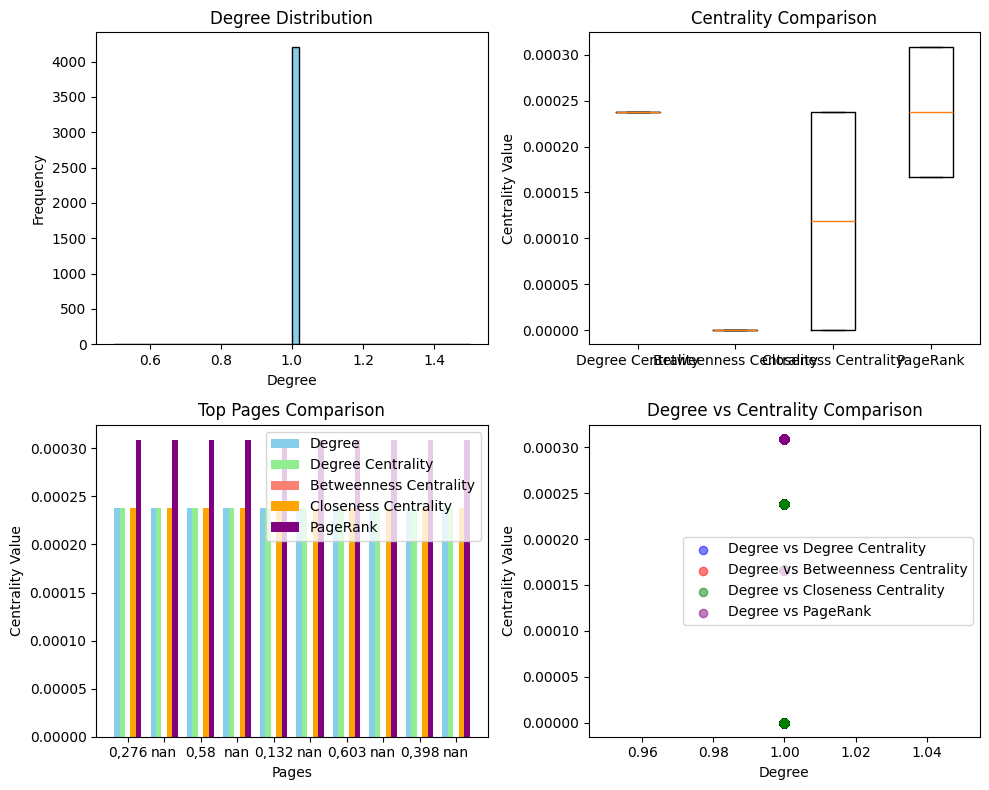

In [10]:
def main():
    """
    Main function to execute the process of downloading data, creating a directed graph,
    performing network analysis, and printing the results.
    """
    # Download the data (edges of the Facebook food pages network)
    edges_df = download_and_read_data()

    # Create a directed graph using the downloaded edges
    print("Creating the graph...")
    G = nx.from_pandas_edgelist(edges_df, 'source', 'target', create_using=nx.DiGraph())

    # Perform network analysis and calculate metrics
    metrics = analyze_network(G)
    print("-==================================================")
    print()
    # Print the analysis results
    print_results(metrics)
    print("===================================================")
    visualize_metrics(G, metrics)

if __name__ == "__main__":
    main()


1. Basic Information:
Number of Pages (4,204): This suggests a relatively large-scale network, indicating that the dataset covers a significant portion of the network, possibly a collection of Facebook pages related to food.
Number of Links (2,102): This shows the total number of connections between pages, suggesting a sparse network where many pages are not directly connected.
Network Density (0.000119): The density is very low, indicating that the pages are not highly interconnected. This could mean that many pages exist with only limited connections to others, or that the network is quite fragmented.
Average Links per Page (1.00): On average, each page has just one link, reinforcing the idea of a sparse network where pages are mostly isolated or connected to a single other page.
Highest Number of Links (1): This indicates that no page has more than one link, which could imply a network with mostly single connections or isolated pages.
2. Degree Centrality:
Average Value (0.000238): This is quite low, suggesting that pages, in general, do not have many direct connections. In a network with low degree centrality, most nodes (pages) are peripheral, with few highly connected hubs.
Highest Value (0.000238): The fact that the highest degree centrality value is the same as the average suggests that there is a lack of highly influential or central nodes within this network.
Top 5 Pages: The pages with the highest degree centrality values all have the same value (0.000238), which might indicate that the centrality metric is very homogeneous across the network. Additionally, the appearance of "nan" (not a number) values could suggest missing or incomplete data for some pages.

3. Betweenness Centrality:
Average Value (0.000000): A value of 0 for betweenness centrality means that these pages do not act as bridges between other pages in the network. In other words, no single page is particularly influential in terms of controlling the flow of information or connections between other pages.
Highest Value (0.000000): The lack of any betweenness centrality (even for the highest value) is indicative of a network with little connectivity or central nodes that could facilitate communication between disconnected parts of the network.
Top 5 Pages: Since all top pages have a betweenness centrality of 0, this reinforces the lack of structural importance for any specific page in connecting different components of the network.

4. Closeness Centrality:
Average Value (0.000119): The low closeness centrality suggests that, on average, pages are far from each other in terms of the shortest paths. Pages in this network are likely not easily reachable from one another.
Highest Value (0.000238): The maximum value here is a bit higher than the average, indicating some pages are slightly closer to others, but still not highly central.
Top 5 Pages: All the top pages in terms of closeness centrality have the same value (0.000238), and many are labeled as "nan", which could suggest incomplete or corrupted data in the dataset.

5. PageRank:
Average Value (0.000238): PageRank values are relatively low, indicating that the pages in the network do not have a significant influence according to this metric. This is typical of a sparse or fragmented network where few pages are highly regarded or authoritative.
Highest Value (0.000309): The highest PageRank is slightly higher than the average, but still quite low, suggesting that there is minimal differentiation in terms of the importance or influence of the pages.
Top 5 Pages: All the top pages for PageRank have the same value (0.000309), and again, many are labeled as "nan", suggesting missing or incomplete data for certain pages.

Overall Insights:
The network is sparse and disconnected, with few pages acting as hubs or central nodes. Most pages have only one connection, and there's little interconnection between pages.
Centrality measures (degree, betweenness, closeness) indicate a lack of influential nodes. No pages serve as significant bridges, and most are relatively isolated in the network.
PageRank values suggest that pages are not highly authoritative or influential, reinforcing the idea of a fragmented network where no page stands out significantly in terms of importance.
The presence of "nan" values for certain pages suggests that some data may be missing or incomplete, which could affect the overall analysis.
This network likely reflects a low-engagement environment, where pages do not have substantial interactions or influence over one another.